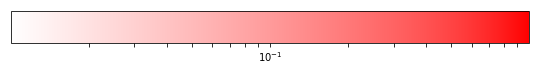

In [35]:
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np

# field values
field = np.loadtxt("dens_field.txt")
#field = field[field!=0]
field = np.sort(field)
n = len(field)


# map field to RGB colorcode 
mapper_list = np.zeros((n,3))
idx = []
for i in range(n):
    # R
    mapper_list[i,0] = 1.0 
    # G
    mp = 1.0 - np.log(1e+02*field[i])/np.log(1e+02)
    if mp < 1 and mp > 0:
        idx.append(i)
        mapper_list[i,1] = mp
        mapper_list[i,2] = mp    
    
norm_mapper_list = mapper_list[idx]
    
# define a color map from the RGB mapper list
cmap = colors.ListedColormap(norm_mapper_list, name='from_field', N=None)

# plot color bar
f = plt.figure(figsize=(9, 1.5))
img = plt.imshow((field[idx],field[idx]), cmap=cmap, norm=colors.LogNorm())
plt.gca().set_visible(False)
cax = plt.axes([0.1, 0.2, 0.8, 0.3])
plt.colorbar(orientation="horizontal", cax=cax)
plt.show()
f.savefig("color_bar_dens.pdf", bbox_inches='tight')

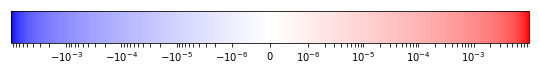

In [40]:
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np
import copy

# field values
field = np.loadtxt("diff_field.txt")
field = np.sort(field)
field = field[field>0]
n = 2*len(field)
norm_mapper_list = np.zeros((n,3))

field_pos = field.copy()
n_pos = len(field_pos)

# map field to RGB colorcode 
mapper_list_pos = np.zeros((n_pos,3))
idx_pos = []
for i in range(n_pos):
    
    #if field_pos[i]!=0:
        
        # R
        mapper_list_pos[i,0] = 1.0
        # G
        mp = 1.0 - np.log(1e+04*field_pos[i])/np.log(1e+02)
        if mp < 1 and mp > 0:
            idx_pos.append(i)
            mapper_list_pos[i,1] = mp
        # B
            mapper_list_pos[i,2] = mp

        
#R
norm_mapper_list_pos = mapper_list_pos[idx_pos]
        
field_neg = np.sort(-field)
n_neg = len(field_neg)

# map field to RGB colorcode 
mapper_list_neg = np.zeros((n_neg,3))
idx_neg = []
for i in range(n_neg):
    
    mp = 1.0 - np.log(-1e+04*field_neg[i])/np.log(1e+02)
    if mp < 1 and mp > 0:
        idx_neg.append(i)
        mapper_list_neg[i,0] = mp
        # G
        mapper_list_neg[i,1] = mp
    # B
    mapper_list_neg[i,2] = 1.0

norm_mapper_list_neg = mapper_list_neg[idx_neg]

norm_mapper_list = np.zeros((len(idx_pos)+len(idx_neg),3))
norm_mapper_list[:,0] = np.concatenate((norm_mapper_list_neg[:,0],norm_mapper_list_pos[:,0])).flatten()
norm_mapper_list[:,1] = np.concatenate((norm_mapper_list_neg[:,1],norm_mapper_list_pos[:,1])).flatten()
norm_mapper_list[:,2] = np.concatenate((norm_mapper_list_neg[:,2],norm_mapper_list_pos[:,2])).flatten()

# define a color map from the RGB mapper list
cmap = colors.ListedColormap(norm_mapper_list, name='from_field', N=None)

#plot color bar

field_pos = field_pos[idx_pos]
field_neg = field_neg[idx_neg]
field = np.concatenate((field_neg,field_pos)).flatten()

f = plt.figure(figsize=(9, 1.5))
img = plt.imshow((field,field), cmap=cmap, norm=colors.SymLogNorm(linthresh=1e-06, linscale=1))
plt.gca().set_visible(False)
cax = plt.axes([0.1, 0.2, 0.8, 0.3])
plt.colorbar(orientation="horizontal", cax=cax)
plt.show()
f.savefig("color_bar_diff.pdf", bbox_inches='tight')